In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../input/position-salary-dataset/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.size

30

In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

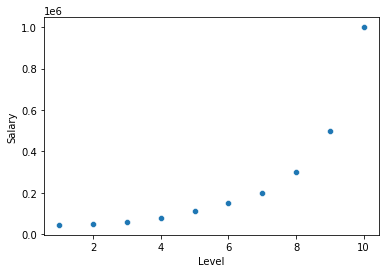

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="Level",y="Salary",data=df)
plt.show()

In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

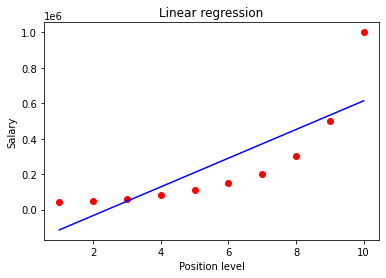

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
lr_model=lr.fit(X,y)
predict_lr=lr_model.predict(X)
plt.scatter(X,y, color = 'red')
plt.plot(X, lr_model.coef_*X + lr_model.intercept_, '-b')
plt.title("Linear regression")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2=r2_score(y,predict_lr)
print("r2=",r2,"\n")

r2= 0.6690412331929895 



Polynomial Regression is a one of the types of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.The 1-degree polynomial is a simple linear regression; therefore, the value of degree must be greater than 1 in Polynomial Regression.

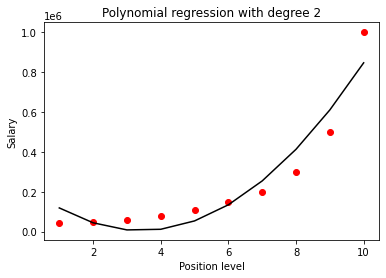

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_reg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly_reg_model=poly_reg.fit(X,y)
plt.scatter(X,y, color = 'red')
plt.plot(X,poly_reg_model.predict(X),color="black")
plt.title("Polynomial regression with degree 2")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
from sklearn.metrics import r2_score
predict_poly_reg=poly_reg_model.predict(X)
r2=r2_score(y,predict_poly_reg)
print("polynomial regression with degree 2 \n")
print("r2=",r2,"\n")

polynomial regression with degree 2 

r2= 0.9162082221443942 



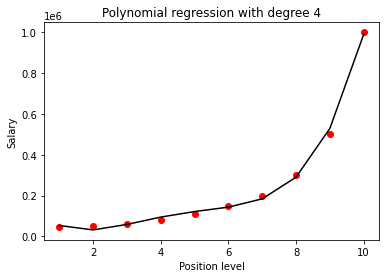

In [12]:
poly_reg=make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
model=poly_reg.fit(X,y)
plt.scatter(X,y, color = 'red')
plt.plot(X,model.predict(X),color="black")
plt.title("Polynomial regression with degree 4")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
# Increasing degree of the polynomial, the complexity of the model also increases.
# Overfitting problem.
# Training error will be low & test error will be high
from sklearn.metrics import r2_score
predict_=model.predict(X)
r2=r2_score(y,predict_)
print("polynomial regression with degree 4 \n") 
print("r2=",r2,"\n")

polynomial regression with degree 4 

r2= 0.9973922891706615 



In [14]:
# predicted value using linear regression
predict_= lr_model.predict([[8]])
predict_

array([451696.96969697])

In [15]:
# predicted value using polynomial regression
predict_= model.predict([[8]])
predict_

array([289994.17249417])

In [16]:
df.loc[df['Level'] == 8] # actual value 

,Position,Level,Salary
7,Senior Partner,8,300000


                                                                                                                Dhanya Jayan